In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats
import networkx as nx

In [23]:
# with open('simulation_results/population_size/sim2_data_trial100.pkl','rb') as file:
#     data_100 = pickle.load(file)

# with open('simulation_results/population_size/sim2_data_trial1000.pkl','rb') as file:
#     data_1000 = pickle.load(file)

# with open('simulation_results/population_size/sim2_data_trial10000.pkl','rb') as file:
#     data_10000 = pickle.load(file)

with open('simulation_results/bridge/sim2_data_trial1000.pkl','rb') as file:
    data_100 = pickle.load(file)

In [24]:
font = {'family' : 'Helvetica Neue',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

V = data_100['freq_timeseries'].shape[0]
Q = data_100['freq_timeseries'].shape[1]

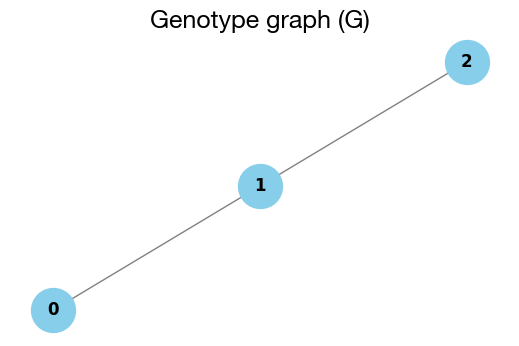

In [25]:
# show the genotype graph 

G = nx.from_numpy_array(data_100['A'])
node_labels = {i: f'{i}' for i in range(len(data_100['A']))}

plt.figure(figsize=(5, 3))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title('Genotype graph (G)')
plt.show()

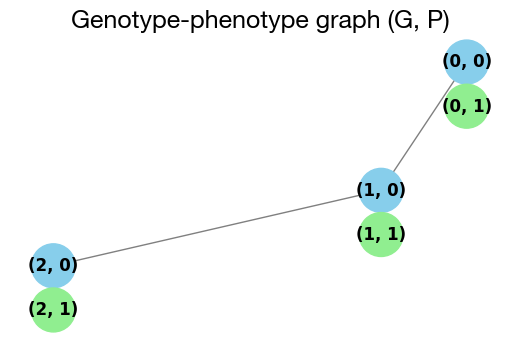

In [26]:
# show the genotype-phenotype graph 

G = nx.from_numpy_array(data_100['A'])
node_labels = {i: f'({i}, 0)' for i in range(len(data_100['A']))}

new_nodes = []
new_edges = []

# add phenotype nodes dynamically to each genotype node in the graph
new_node_start_index = len(G.nodes)

for node in G.nodes:
    for i in range(Q-1):  
        new_node = new_node_start_index + node * (Q-1) + i
        new_nodes.append(new_node)  # collect new node
        new_edges.append((node, new_node))  # collect edge between parent and child

G.add_nodes_from(new_nodes)  
G.add_edges_from(new_edges)  

# labels for phenotype nodes
for child_node in new_nodes:
    genotype_parent = child_node % len(new_nodes)
    child_number = child_node % (Q-1) + 1
    node_labels[child_node] = '(' + str(genotype_parent) + ', ' + str(child_number) + ')'

# colors 
node_colors = []
for node in G.nodes:
    if node < len(data_100['A']):  
        node_colors.append('skyblue')
    else:  
        node_colors.append('lightgreen')

# positioning the nodes
pos = nx.spring_layout(G, seed=42)

# offset the children below their parent nodes
child_pos_offset = 0.20 
for node in range(len(data_100['A'])):
    children = [n for n in G.neighbors(node)]  
    child_count = 0
    for child in children:
        if child >= len(data_100['A']): 
            pos[child] = (pos[node][0], pos[node][1] - child_pos_offset * (child_count + 1))
            child_count += 1

plt.figure(figsize=(5, 3))
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color=node_colors, font_size=12, font_weight='bold', edge_color='gray')

plt.title("Genotype-phenotype graph (G, P)")
plt.show()

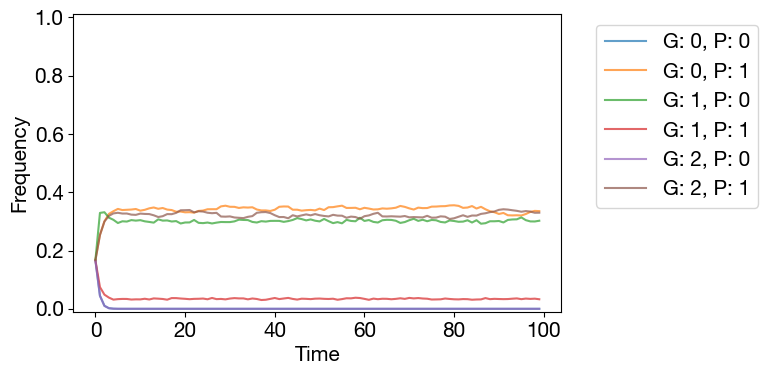

In [27]:
plt.figure(figsize=(8, 4))

# loop through each (genotype, phenotype) pair
for i in range(V):  # genotypes 
    for j in range(Q):  # phenotypes 
        plt.plot(data_100['freq_timeseries'][i, j, :], label=f'G: {i}, P: {j}', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(-0.01,1.01)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [29]:
np.mean(data_100['freq_timeseries'][:,:,20:], axis=2)

array([[0.        , 0.34238875],
       [0.3011225 , 0.03414875],
       [0.        , 0.32234   ]])

In [30]:
np.mean(data_100['freq_timeseries'][:,:,99:], axis=2)

array([[0.    , 0.3352],
       [0.3022, 0.0328],
       [0.    , 0.3298]])

Population size test

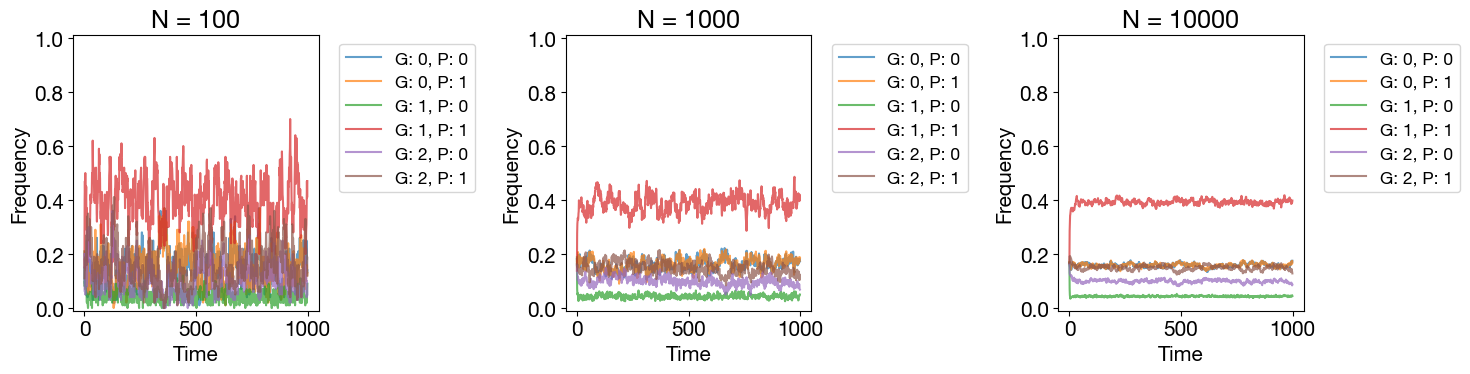

In [11]:
datasets = [data_100 , data_1000, data_10000]

dataset_names = ['N = 100', 'N = 1000', 'N = 10000'] # Names for the titles of each subplot

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) # 1 row, 3 columns of subplots

for index, data in enumerate(datasets):
    ax = axes[index] # Select the current subplot
    for i in range(V):  # genotypes
        for j in range(Q):  # phenotypes
            ax.plot(data['freq_timeseries'][i, j, :], label=f'G: {i}, P: {j}', alpha=0.7)

    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_ylim(-0.01, 1.01)
    ax.set_title(dataset_names[index]) # Set title for each subplot

    # Adjust legend for each subplot to be outside on the right
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()